In [70]:
import configparser
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

config = configparser.ConfigParser()
config.read('configuration.ini')

sys.path.append(config['input files']['lib_path'])

import utility as utl

plt.rcParams.update({"text.usetex": True})


In [71]:
path = '%s/%s'%(config['input files']['input_path'],config['strain analysis']['input_file'])
data = pd.read_csv(path,sep = ' ')

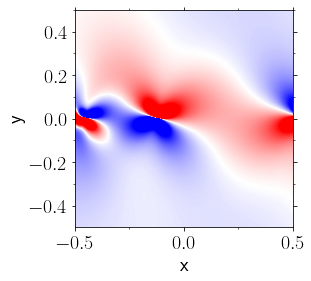

In [72]:
def vonMisesStrain(exx,eyy,exy):
    p   = 0.5*(exx+eyy);
    r2  = ((exx-eyy)*(exx-eyy)+4*exy*exy)*0.25;
    r   = np.sqrt(r2);
    e1  = p + r;
    e2  = p - r;
    return np.sqrt( e1 * e1 + e2 * e2 - e1 * e2 );

n = 200
vonMises = vonMisesStrain(data.exx,data.eyy,data.exy)
data_reshaped = np.c_[vonMises].reshape((n,n)).transpose()
utl.PltBitmap(data_reshaped,
              title = 'png/vonMisesStrain.png',
             )

In [53]:
help(utl.PltBitmap)

Help on function PltBitmap in module utility:

PltBitmap(value, xlabel='x', ylabel='y', xlim=(-0.5, 0.5), ylim=(-0.5, 0.5), zscore=True, title='cxy.png', colorbar=False, **kwargs)

